### 1. Create data and implement PCA algorithm then visualize each step like the below figure.

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

##### Subtract the mean of each variable

In [96]:
# Generate dataset.
X = np.random.randint(10,50,100).reshape(20,5)
X

array([[19, 41, 10, 19, 15],
       [37, 24, 39, 27, 14],
       [44, 42, 34, 35, 12],
       [38, 47, 17, 41, 49],
       [48, 18, 28, 28, 44],
       [11, 28, 32, 38, 47],
       [25, 46, 22, 35, 25],
       [22, 41, 36, 41, 24],
       [24, 26, 40, 38, 21],
       [46, 15, 34, 33, 42],
       [17, 32, 46, 34, 28],
       [36, 16, 20, 41, 29],
       [42, 44, 43, 40, 10],
       [41, 32, 26, 13, 40],
       [29, 46, 34, 20, 43],
       [17, 26, 43, 43, 21],
       [10, 23, 47, 43, 22],
       [19, 19, 12, 13, 43],
       [19, 40, 47, 11, 27],
       [35, 26, 16, 25, 24]])

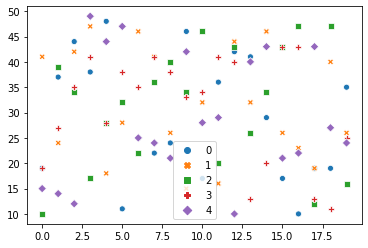

In [97]:
sns.scatterplot(data=X)

In [98]:
# mean Centering the data  
X_meaned = X - np.mean(X , axis=0)
X_meaned

array([[ -9.95,   9.4 , -21.3 , -11.9 , -14.  ],
       [  8.05,  -7.6 ,   7.7 ,  -3.9 , -15.  ],
       [ 15.05,  10.4 ,   2.7 ,   4.1 , -17.  ],
       [  9.05,  15.4 , -14.3 ,  10.1 ,  20.  ],
       [ 19.05, -13.6 ,  -3.3 ,  -2.9 ,  15.  ],
       [-17.95,  -3.6 ,   0.7 ,   7.1 ,  18.  ],
       [ -3.95,  14.4 ,  -9.3 ,   4.1 ,  -4.  ],
       [ -6.95,   9.4 ,   4.7 ,  10.1 ,  -5.  ],
       [ -4.95,  -5.6 ,   8.7 ,   7.1 ,  -8.  ],
       [ 17.05, -16.6 ,   2.7 ,   2.1 ,  13.  ],
       [-11.95,   0.4 ,  14.7 ,   3.1 ,  -1.  ],
       [  7.05, -15.6 , -11.3 ,  10.1 ,   0.  ],
       [ 13.05,  12.4 ,  11.7 ,   9.1 , -19.  ],
       [ 12.05,   0.4 ,  -5.3 , -17.9 ,  11.  ],
       [  0.05,  14.4 ,   2.7 , -10.9 ,  14.  ],
       [-11.95,  -5.6 ,  11.7 ,  12.1 ,  -8.  ],
       [-18.95,  -8.6 ,  15.7 ,  12.1 ,  -7.  ],
       [ -9.95, -12.6 , -19.3 , -17.9 ,  14.  ],
       [ -9.95,   8.4 ,  15.7 , -19.9 ,  -2.  ],
       [  6.05,  -5.6 , -15.3 ,  -5.9 ,  -5.  ]])

##### Calculate the Covariance Matrix

In [99]:
# calculating the covariance matrix of the mean-centered data.
cov_mat = np.cov(X_meaned , rowvar=False) # set rowvar to False to get the covariance matrix in the required dimensions
cov_mat

array([[146.36578947,  -7.38947368, -28.61578947,  -6.58421053,
         10.21052632],
       [ -7.38947368, 119.09473684,   1.70526316,  -4.14736842,
        -27.42105263],
       [-28.61578947,   1.70526316, 141.06315789,  38.92631579,
        -47.        ],
       [ -6.58421053,  -4.14736842,  38.92631579, 115.04210526,
        -28.57894737],
       [ 10.21052632, -27.42105263, -47.        , -28.57894737,
        155.26315789]])

##### Compute the Eigenvalues and Eigenvectors

In [100]:
# Calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
print(eigen_values)
print('-----')
print(eigen_vectors)

[ 83.37170872  88.96443343 132.00956814 142.36136711 230.12186997]
-----
[[-0.24183737  0.09279199  0.33574553  0.84658316 -0.32167719]
 [-0.15431615  0.59417238 -0.73099235  0.24509419  0.16948374]
 [-0.71972303  0.09566192  0.32679815 -0.12039499  0.59292122]
 [ 0.57294091  0.57451604  0.45138697  0.06088427  0.36635085]
 [-0.26728017  0.54692682  0.20585894 -0.45279569 -0.61808618]]


##### Sort Eigenvalues in descending order

In [101]:
# sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_index

array([4, 3, 2, 1, 0], dtype=int64)

In [102]:
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvalue

array([230.12186997, 142.36136711, 132.00956814,  88.96443343,
        83.37170872])

In [103]:
# corresponding eigenvectors
sorted_eigenvectors = eigen_vectors[:,sorted_index]
sorted_eigenvectors

array([[-0.32167719,  0.84658316,  0.33574553,  0.09279199, -0.24183737],
       [ 0.16948374,  0.24509419, -0.73099235,  0.59417238, -0.15431615],
       [ 0.59292122, -0.12039499,  0.32679815,  0.09566192, -0.71972303],
       [ 0.36635085,  0.06088427,  0.45138697,  0.57451604,  0.57294091],
       [-0.61808618, -0.45279569,  0.20585894,  0.54692682, -0.26728017]])

##### Select a subset from the rearranged Eigenvalue matrix

In [104]:
# select the first n eigenvectors, n is desired dimension of our final reduced data.
n_components = 2 
eigenvector_subset = sorted_eigenvectors[:, 0:n_components]
eigenvector_subset

array([[-0.32167719,  0.84658316],
       [ 0.16948374,  0.24509419],
       [ 0.59292122, -0.12039499],
       [ 0.36635085,  0.06088427],
       [-0.61808618, -0.45279569]])

##### Transform the data 

In [105]:
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
X_reduced

array([[ -3.54175553,   2.05941301],
       [  8.53043994,  10.57972397],
       [ 10.53177993,  22.91214194],
       [-17.44148245,   4.71669372],
       [-20.72327951,   6.22293207],
       [ -2.94545112, -23.88082751],
       [  2.17140656,   3.36583443],
       [ 13.40610787,  -1.26681454],
       [ 13.34738829,  -2.55590669],
       [-13.96292238,   4.28212597],
       [ 14.38155175, -11.14690055],
       [ -7.91163672,   4.12033645],
       [ 19.91831942,  21.83562181],
       [-20.30752737,   4.86687728],
       [ -8.62106151,  -3.75615919],
       [ 19.20964657,  -8.53875248],
       [ 22.70653442, -16.13449283],
       [-25.58907338, -16.61703402],
       [  7.87900505,  -8.56091815],
       [-11.03798981,   7.4961053 ]])

The final dimensions of X_reduced will be (20, 2) and originally the data was of higher dimensions (20,5).

In [106]:
def PCA(X, n_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis=0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar=False)
     
    #Step-3
    eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:, 0:n_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose(), X_meaned.transpose()).transpose()
     
    return X_reduced

In [107]:
mat_reduced = PCA(X, 2)
mat_reduced

array([[ -3.54175553,   2.05941301],
       [  8.53043994,  10.57972397],
       [ 10.53177993,  22.91214194],
       [-17.44148245,   4.71669372],
       [-20.72327951,   6.22293207],
       [ -2.94545112, -23.88082751],
       [  2.17140656,   3.36583443],
       [ 13.40610787,  -1.26681454],
       [ 13.34738829,  -2.55590669],
       [-13.96292238,   4.28212597],
       [ 14.38155175, -11.14690055],
       [ -7.91163672,   4.12033645],
       [ 19.91831942,  21.83562181],
       [-20.30752737,   4.86687728],
       [ -8.62106151,  -3.75615919],
       [ 19.20964657,  -8.53875248],
       [ 22.70653442, -16.13449283],
       [-25.58907338, -16.61703402],
       [  7.87900505,  -8.56091815],
       [-11.03798981,   7.4961053 ]])

In [108]:
# Creating a Pandas DataFrame of reduced Dataset
reduced_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
reduced_df.head()

,PC1,PC2
0,-3.541756,2.059413
1,8.530440,10.579724
2,10.531780,22.912142
3,-17.441482,4.716694
4,-20.723280,6.222932


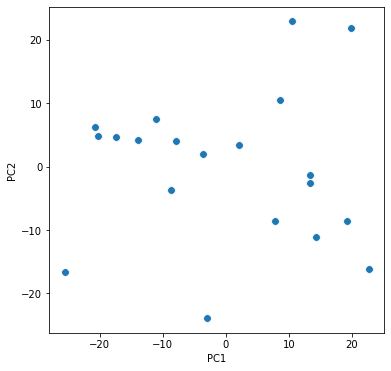

In [110]:
plt.figure(figsize = (6,6))
sns.scatterplot(data=reduced_df, x='PC1', y='PC2', s = 60)

### 2. Implement PCA algorithm to reduce dimension (2D) of iris dataset (https://archive.ics.uci.edu/ml/datasets/iris), then visualize  the result.

In [111]:
# Read the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [112]:
# prepare the data
x = data.iloc[:, 0:4]
 
# prepare the target
target = data.iloc[:, 4]

In [113]:
# Reduce orginal data from 5 components to 2 components
mat_reduced = PCA(x, 2)

In [114]:
# Creating a dataFrame of reduced dataset
iris_reduced = pd.DataFrame(mat_reduced, columns=['PC1','PC2'])

In [115]:
# Concat it with target variable to create a complete Dataset
iris_reduced = pd.concat([iris_reduced, pd.DataFrame(target)], axis=1)

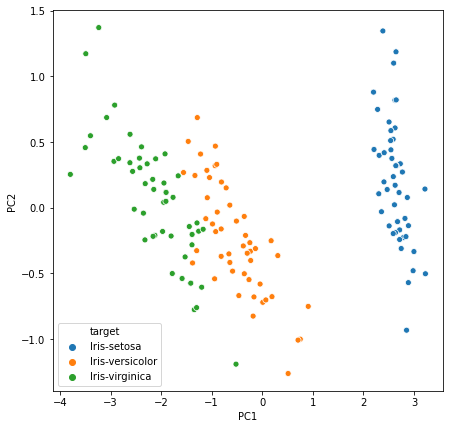

In [116]:
plt.figure(figsize = (7,7))
sns.scatterplot(data = iris_reduced, x='PC1', y='PC2', hue='target')

### 3. Use PCA in sklearn to iris dataset and compare the result with the question 2.

In [131]:
from sklearn.decomposition import PCA

In [156]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [157]:
final_df = pd.concat([principal_df, data[['target']]], axis = 1)

In [158]:
# eigenvalues
pca.singular_values_

array([25.08986398,  6.00785254])

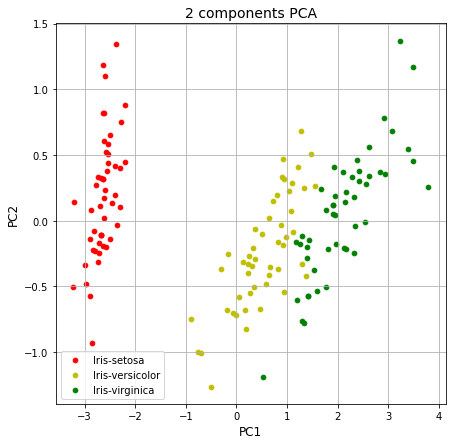

In [163]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 12)
ax.set_ylabel('PC2', fontsize = 12)
ax.set_title('2 components PCA', fontsize = 14)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'y', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color, s = 22)
ax.legend(targets)
ax.grid()